In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### Their fields and data types are:

* Rank - Ranking of overall sales, integer

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.), object

* Year - Year of the game's release, float

* Genre - Genre of the game ,object

* Publisher - Publisher of the game, object

* NA_Sales - Sales in North America (in millions), float

* EU_Sales - Sales in Europe (in millions), float

* JP_Sales - Sales in Japan (in millions), float

* Other_Sales - Sales in the rest of the world (in millions), float

* Global_Sales - Total worldwide sales, float

In [2]:
d = pd.read_csv('vgsales.csv')

##### Get the first few records and display it. Let's take some time to overview some data and it's feature name

In [3]:
df = d.copy()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape 

(16598, 11)

##### Here, We can see the shape of the dataset that we are using here. .shape attribute will return the tuple with (number of rows and number of columns)

In [5]:
df.size

182578

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Overall information of datasets...

##### Using this .info() method we can see that, it will return the complete details about our dataset behavior. Like

* Total Number of instances,
* Feature Names,
* Number of missing values,
* What's the datatype for all features, And
* It's memory usage

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

* Now, We need to know how many features are having missing values
* Here, we have only two features are having missing values are Year and Publisher.

In [8]:
df['Publisher'].tail()

16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, dtype: object

array([[<AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>],
       [<AxesSubplot:title={'center':'EU_Sales'}>,
        <AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>],
       [<AxesSubplot:title={'center':'Global_Sales'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

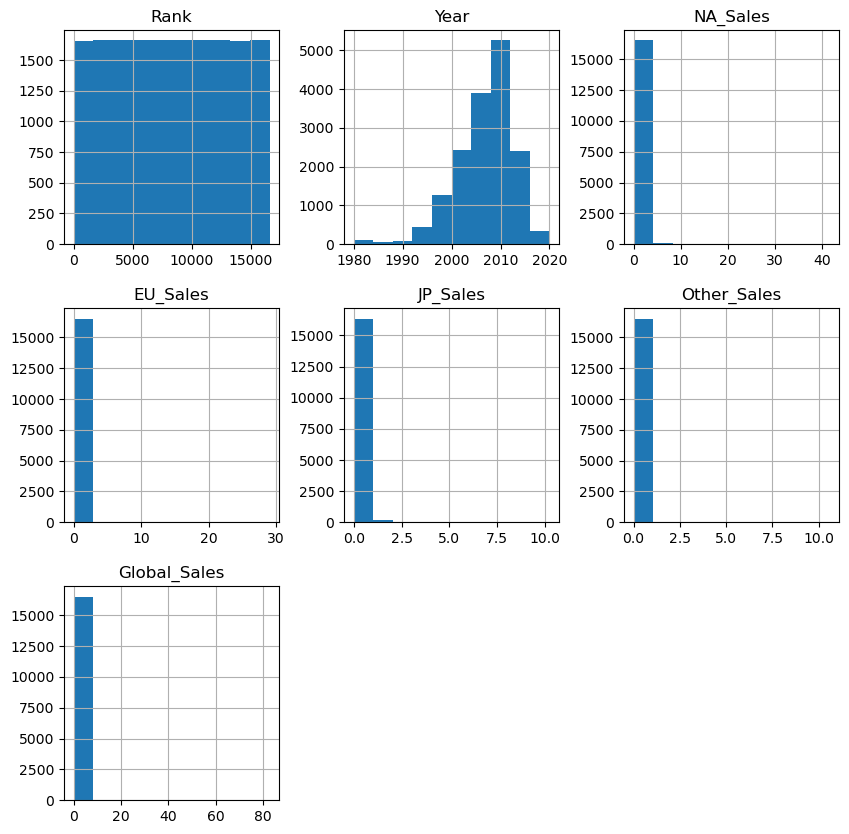

In [9]:
df.hist(figsize=(10,10))

* Check for the Skewness and modality of are dataset 
* For better understanding

In [10]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

* We use the .value_counts() methods to get the value which is continue repeating.

<AxesSubplot:title={'center':'MOST SELLING OF GAMES BY CATEGORY'}, xlabel='Genre', ylabel='count'>

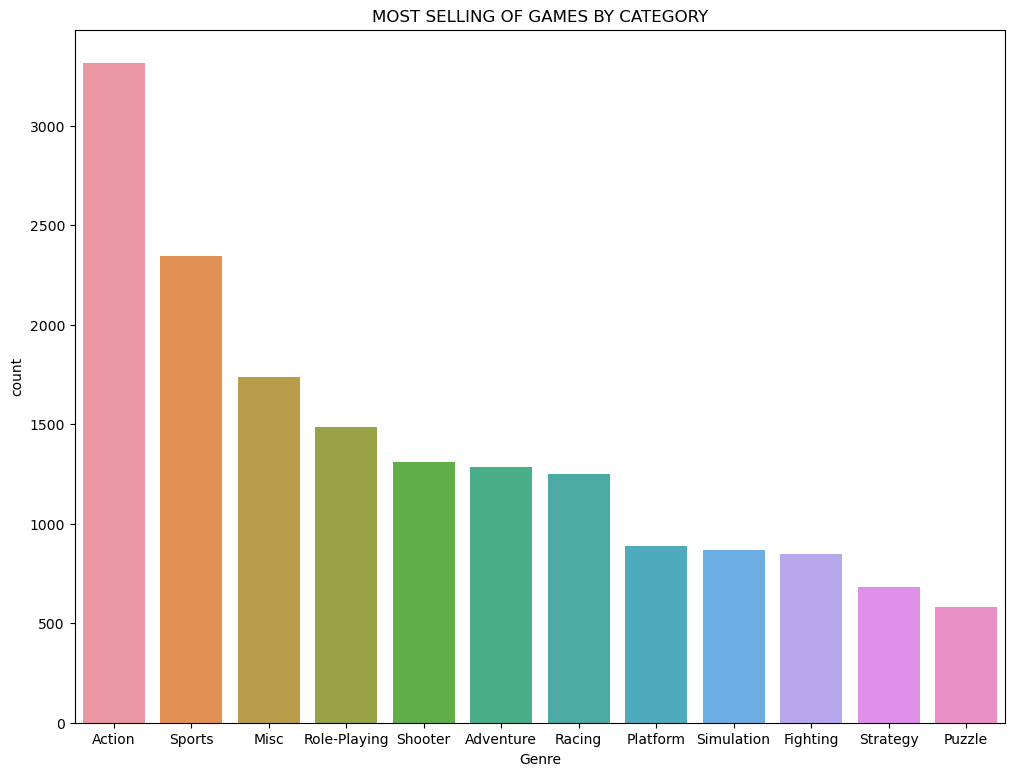

In [11]:
plt.figure(figsize=(12,9))
plt.title('MOST SELLING OF GAMES BY CATEGORY')
sns.countplot(data = df,x = 'Genre',order = df['Genre'].value_counts().index)

##### * We have ploted the countplot of 'Genre' for checking for maximum and minimum sales 
##### * Which category having the most selling games

# handling missing values

In [12]:
df['Year'] = pd.to_numeric(df['Year'],errors='coerce')

##### * Changing the ['Year'] float_values into integer_values 
##### * Beacause every values are like 2000.0 , 1999.0 

In [13]:
df['Year'].isnull().sum()

271

In [14]:
df = df.dropna(subset=['Year'])

##### * dropted the missing value rows from the dataset because there are 5 missing_values only

In [15]:
df['Year'].isnull().sum()

0

In [16]:
df['Year'] = df['Year'].astype(int)

In [17]:
df.Publisher = df.Publisher.fillna(df.Publisher.mode()[0])

#### * filling the missing value with the mode 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),


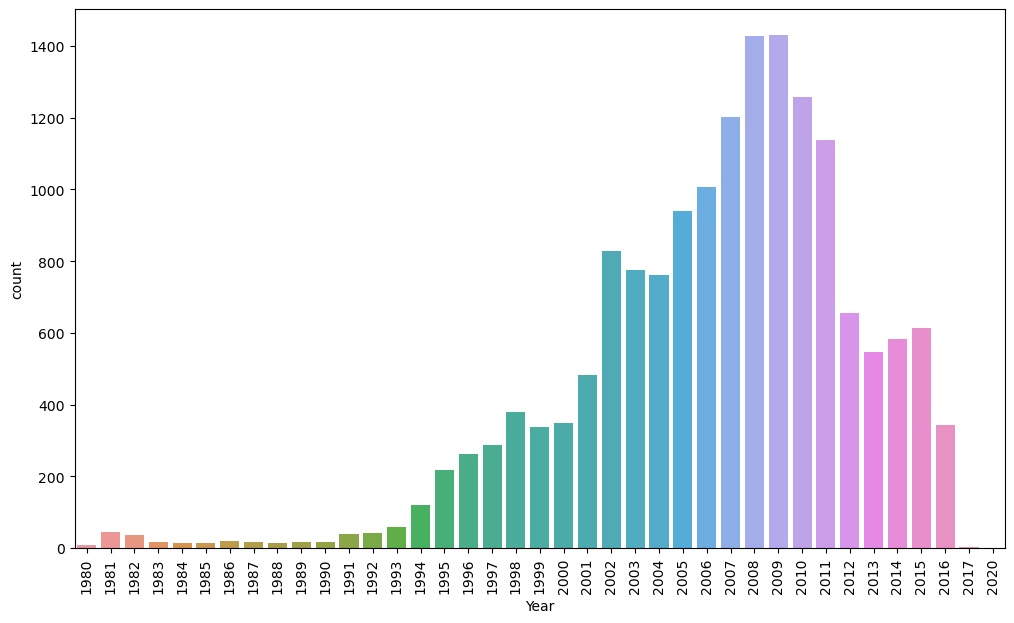

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x = 'Year',)
plt.xticks(rotation='vertical')

#### * We have ploted the countplot of column 'Year' to see which year is having the most sales of games
#### * In 2008 and 2009 year are showing the maximum selling of game 

In [19]:
df.drop(['Rank'],axis=1,inplace=True)

#### * Unnecessary column in the dataset 

In [20]:
data_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002,GBA,Platform,0.01,0.00,0.00
16594,2003,GC,Shooter,0.01,0.00,0.00
16595,2008,PS2,Racing,0.00,0.00,0.00
16596,2010,DS,Puzzle,0.00,0.01,0.00


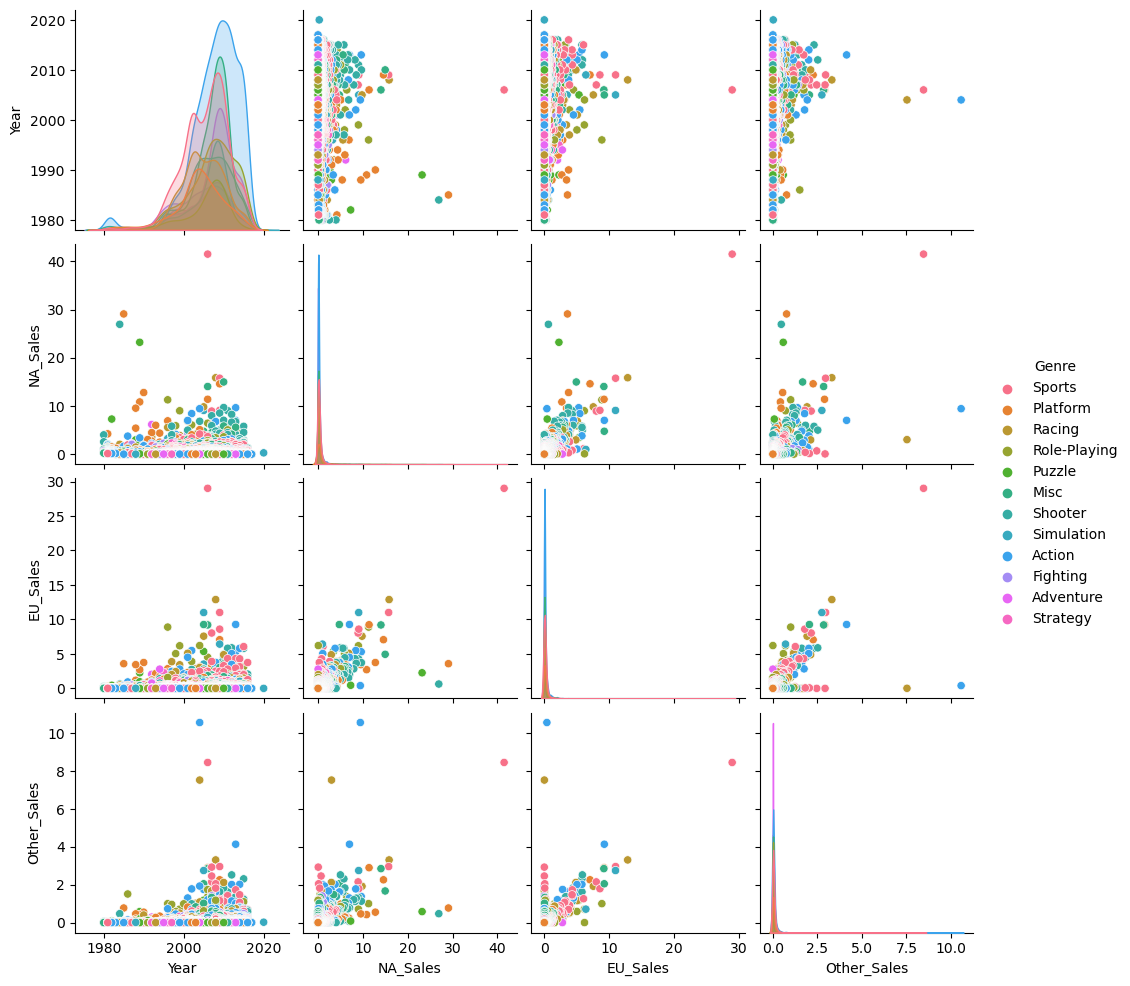

In [21]:
sns.pairplot(data=data_pair,hue='Genre')

#### * Pair plot is showing scattering about the data how points are scattered

In [22]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#### * Statistical information about our dataset 

In [23]:
df.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.091402,1.000000,0.768936,0.451285,0.634508,0.941268
EU_Sales,0.006014,0.768936,1.000000,0.436414,0.726266,0.903271
JP_Sales,-0.169316,0.451285,0.436414,1.000000,0.290653,0.612794
Other_Sales,0.041058,0.634508,0.726266,0.290653,1.000000,0.747974
Global_Sales,-0.074735,0.941268,0.903271,0.612794,0.747974,1.000000


<AxesSubplot:>

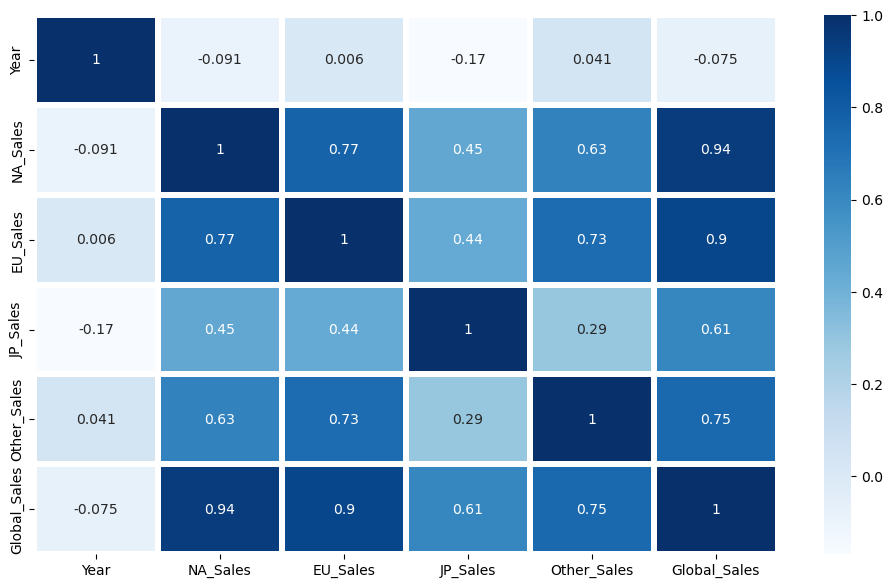

In [24]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidths=3)

##### * ploted the heatmap to check the correlation for better visualization 

# Multiple Linear Regression

#### we are going for multiple regression beacuse we have correlation with multiple features

In [25]:
X = df.iloc[:,5:-1].values
y = df['Global_Sales']

#### Selected for Train and test variable x and y

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(X)

#### Standardization makes all variables contribute equally.

In [27]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

#### select train and target feature for train and test splites

In [28]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.32305993 -0.25072104 -0.25248519 -0.20184091]
 [ 0.00558086 -0.13278495  2.47583124 -0.14917596]
 [-0.32305993 -0.25072104 -0.25248519 -0.25450586]
 ...
 [ 1.00367512  0.98760791 -0.18828951  0.79879312]
 [-0.32305993 -0.27037705 -0.25248519 -0.25450586]
 [-0.213513   -0.23106502  0.00429754 -0.20184091]]
[[-0.00659102 -0.15244096 -0.25248519 -0.20184091]
 [-0.18916924 -0.23106502 -0.25248519 -0.20184091]
 [-0.06745043  0.02446317 -0.25248519  0.00881889]
 ...
 [-0.28654429 -0.25072104 -0.25248519 -0.25450586]
 [-0.25002865 -0.25072104 -0.25248519 -0.25450586]
 [-0.25002865 -0.21140901 -0.25248519 -0.20184091]]
14465    0.03
1638     1.22
15121    0.02
12944    0.05
7730     0.20
         ... 
13630    0.04
5467     0.33
870      1.96
16053    0.01
7387     0.21
Name: Global_Sales, Length: 13061, dtype: float64
5468     0.33
8769     0.15
4577     0.42
2345     0.89
11065    0.09
         ... 
6003     0.29
4170     0.47
12678    0.06
11478    0.08
10511    0.10
Name: Global_Sales

## Model Selection 

In [29]:
from sklearn.linear_model import LinearRegression
m_reg = LinearRegression()
m_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
print('Intercept: ',m_reg.intercept_)
print('coefficient: ',m_reg.coef_)

Intercept:  0.5402209563383368
coefficient:  [0.82152085 0.50866578 0.31157051 0.18975608]


##### * ensures that the model will be unbiased
##### * the prediction of the machine is depend on the coeffiecient. 
##### * coefficient indicates the direction of the relationship between a predictor variable and the response variable.

In [31]:
y_train_pred = m_reg.predict(X_train)
y_test_pred = m_reg.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_test_pred)
print(r2_MultiLinear)

0.999993644506754


In [33]:
from sklearn import metrics
meanABErr = metrics.mean_absolute_error(y_test,y_test_pred)
meanSqErr = metrics.mean_squared_error(y_test,y_test_pred)
rootmeanSqErr = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

print('mean absolute error',meanABErr)
print('mean squared error',meanSqErr)
print('root mean squared error',rootmeanSqErr)

mean absolute error 0.002908937135920123
mean squared error 2.715409964121901e-05
root mean squared error 0.005210959570100215


In [34]:
r2_MultiLinear = r2_score(y_test,y_test_pred)
print(r2_MultiLinear)

0.999993644506754


##### The R2 value it cannot be that much perfect so we will go for decision tree regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=32)

In [36]:
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

print(r2_score(y_test, pred))

0.8542584637387283


In [41]:
n=X_train.shape[0]
k=X_train.shape[1]

adjrsquare=1-(1-r2_MultiLinear)*(n-1)/(n-k-1)
adjrsquare




0.9999936425596053

In [37]:
X_train.shape

(13061, 4)

In [40]:
r2_MultiLinear

0.999993644506754